In [101]:
# step 1: import needed packages
import pandas as pd
import itertools
import numpy as np

In [ ]:
# step 2 data aggregation analysis DIT MOET JE 3 KEER DOEN DUS DE ITEM RESEARCHED TELKENS AANPASSEN

In [103]:

# === Instellingen ===HIER AANPASSEN!!!!!!!!
excel_path = "/Users/biekeleenknegt/Desktop/Real Demandan.xlsx"
item_researched= "size"# pas dit aan naar channel/ size/ product
sheet_name = f"{item_researched}_data"  # of pas her aan naar channel_data/size_data/product_data


# === Data inladen ===
df = pd.read_excel(excel_path, sheet_name=sheet_name)
df.set_index(df.columns[0], inplace=True)  # zet 'Rijlabels' als index
df = df.apply(pd.to_numeric, errors='coerce')  # zorg dat alles numeriek is

# === Combinaties maken ===
tobecombined = df.index.tolist()
columns = df.columns.tolist()
combinations = list(itertools.combinations(tobecombined, 2))

# === Bereken MPE ===
results = []

for factor1, factor2 in combinations:
    diffs = (df.loc[factor1] - df.loc[factor2]) / df.loc[factor2]

    row = {
        'Percetage difference': f'{factor1} vs {factor2}',
        **diffs.to_dict(),
        
    }
    results.append(row)

# === Dataframe maken ===
result_df = pd.DataFrame(results)
result_df.set_index('Percetage difference', inplace=True)

# === Naar Excel schrijven (optioneel) ===
result_df.to_excel(f"{item_researched}_mpe_analysis.xlsx")

# === Output tonen ===
print(f"{item_researched} MPE Analysis")
print(result_df)
# === Stap 5: Zet resultaat in DataFrame en schrijf weg naar Excel ===
result_df = pd.DataFrame(results)
result_df.set_index('Percetage difference', inplace=True)

output_path = f"/Users/biekeleenknegt/Documents/Github/SCM_GW/{item_researched}_mpe_analysis.xlsx"
result_df.to_excel(output_path)

print(f"Results saved: {output_path}")


size MPE Analysis
                          2019      2020      2021      2022      2023  \
Percetage difference                                                     
L vs M               -0.088869 -0.118377 -0.011334 -0.020101 -0.110149   
L vs onesize          3.972500  3.400826  3.685950  3.989339  4.571429   
L vs S                0.066488  0.197302  0.220011  0.053105 -0.014379   
L vs XL               0.892483  1.071984  1.147727  0.867518  0.830097   
L vs XS               0.178318  0.212984  0.250276  0.152142  0.059485   
L vs XXL              2.342857  2.021277  2.221591  2.205479  2.040323   
L vs XXS              1.508197  1.502938  1.319018  1.427386  1.193986   
M vs onesize          4.457500  3.991736  3.739669  4.091684  5.261084   
M vs S                0.170509  0.358066  0.233997  0.074707  0.107625   
M vs XL               1.077069  1.350195  1.172348  0.905826  1.056634   
M vs XS               0.293246  0.375854  0.264609  0.175775  0.190632   
M vs XXL            

In [ ]:
import pandas as pd

# === Pad en sheetnaam ===
file_path = f"/Users/biekeleenknegt/Documents/Github/SCM_GW/{item_researched}_mpe_analysis.xlsx"
sheet_name = "Sheet1"

# === Inlezen en voorbereiden ===
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.columns = df.columns.astype(str).str.strip()
df.set_index(df.columns[0], inplace=True)

# === Groepdefinities ===
groepen = {
    'Years': ['2019', '2020', '2021', '2022', '2023'],
    'Countries': ['Amsterdam', 'Berlin', 'Brussels', 'Copenhagen', 'Helsinki',
                  'Madrid', 'Paris', 'Platform', 'Rome', 'Stockholm', 'Webshop'],
    'Products': ['06GE2U92FA', 'DTPQ67872X', 'G8WP29EHC6', 'HYT3MYM7CY', 'IMFA21HLV3',
                 'JU9OS20S99', 'PPB56V08LB', 'R5X6KPETN3', 'RX38XS00QN'],
    'Sizes': ['L', 'M', 'onesize', 'S', 'XL', 'XS', 'XXL', 'XXS']
}

# === Hulpfunctie om blokken te bouwen ===
def maak_blok(df, kolomnamen, label):
    aanwezige = [col for col in kolomnamen if col in df.columns]
    if not aanwezige:
        print(f"❌ Kolommen voor blok '{label}' niet gevonden in de data.")
        return None
    blok = df[aanwezige].copy()
    blok[f"{label}_Average"] = blok.mean(axis=1)
    blok[f"{label}_StdDev"] = blok.std(axis=1)
    return blok

# === Alle blokken verzamelen ===
blokken = []
for naam, kolommen in groepen.items():
    blok = maak_blok(df, kolommen, naam)
    if blok is not None:
        blokken.append(blok)

# === Combineer alle blokken naast elkaar ===
samengesteld_df = pd.concat(blokken, axis=1)
samengesteld_df.insert(0, "Percentage difference --> MPE (mean percentage error)", samengesteld_df.index)

# === Wegschrijven naar Excel ===
output_path = f"/Users/biekeleenknegt/Documents/Github/SCM_GW/{item_researched}_mpe_avg_stdv.xlsx"
samengesteld_df.to_excel(output_path, index=False)

print(f"✅ Alles opgeslagen in: {output_path}")




❌ Kolommen voor blok 'Sizes' niet gevonden in de data.
✅ Alles opgeslagen in: /Users/biekeleenknegt/Documents/Github/SCM_GW/size_mpe_avg_stdv.xlsx


STEP 3: NETWORK VISUALISATION

oke dus nu hebben we dus per dingen de st dev en de avergae

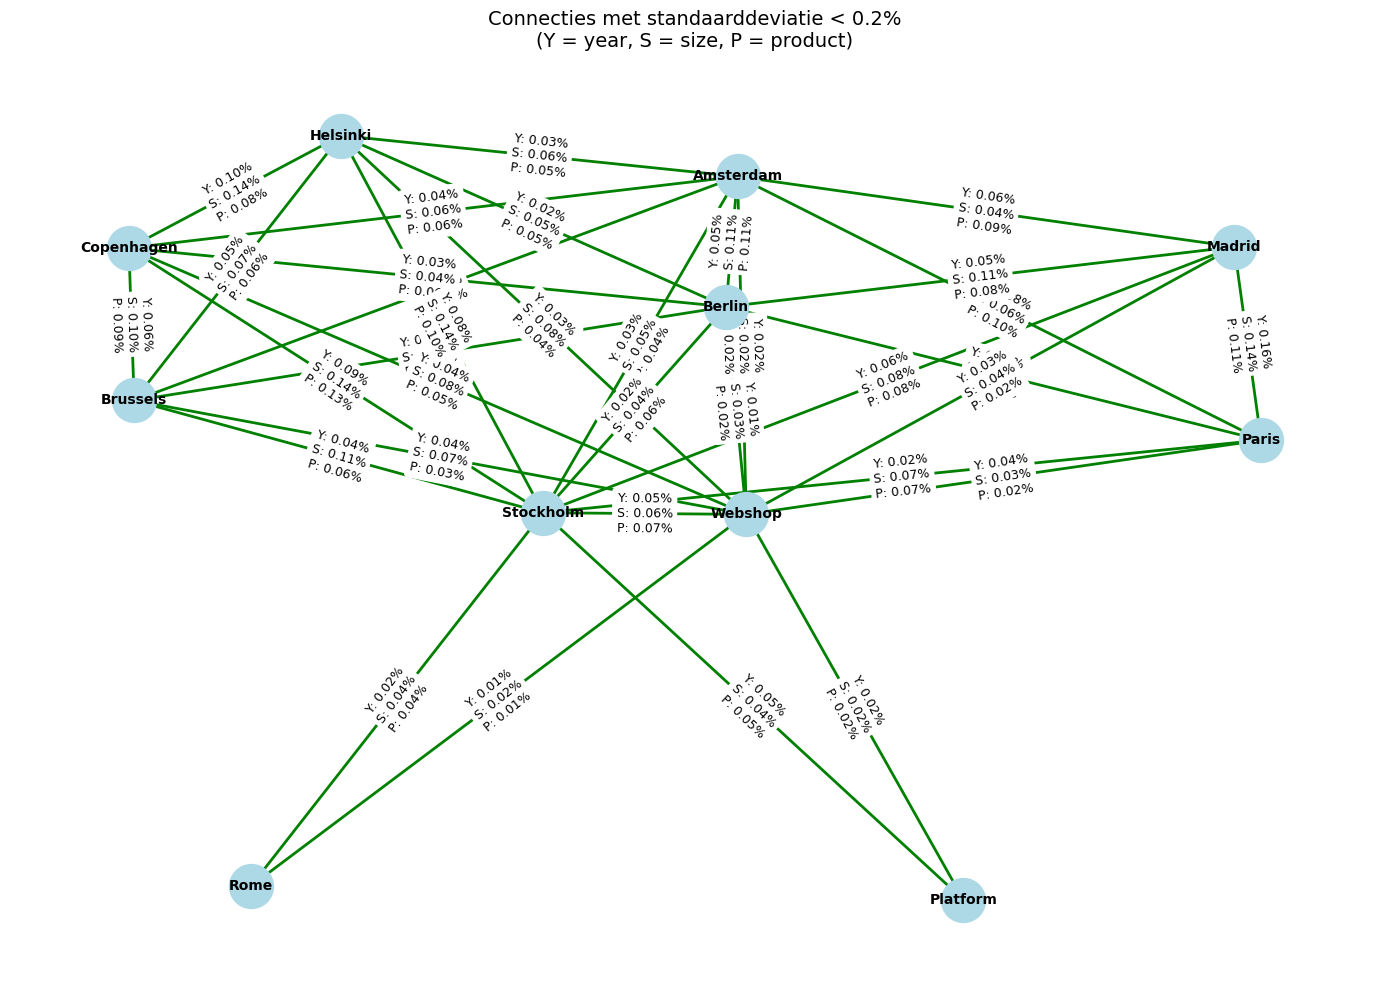

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

file_path = f"/Users/biekeleenknegt/Documents/Github/SCM_GW/channel_mpe_avg_stdv.xlsx"
sheet_name = "Sheet1"
std_dev_threshold = .2  # hier kun je mee spelen

# === Data inlezen ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Strip '%' en vervang komma’s door punten → zet om naar float
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Filter: alleen rijen waar alle drie de standaarddeviaties < drempel
filtered = df[
    (df['Years_StdDev'] < std_dev_threshold) &
    (df['Products_StdDev'] < std_dev_threshold) &
    (df['Sizes_StdDev'] < std_dev_threshold)
]

# Extract edges en bijhorende labels met 3 std. dev's
edges = []
edge_labels = {}
for _, row in filtered.iterrows():
    loc1, loc2 = row.iloc[0].split(" vs ")
    edges.append((loc1, loc2))
    label = (
        f"Y: {row['Years_StdDev']:.2f}%\n"
        f"S: {row['Products_StdDev']:.2f}%\n"
        f"P: {row['Sizes_StdDev']:.2f}%"
        
    )
    edge_labels[(loc1, loc2)] = label

# Unieke locaties
nodes = sorted(set([loc for edge in edges for loc in edge]))

# === Graaf tekenen ===
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color='green', width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Teken standaarddeviaties op de lijnen
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title(f"Connecties met standaarddeviatie < {std_dev_threshold}%\n(Y = year, S = size, P = product)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


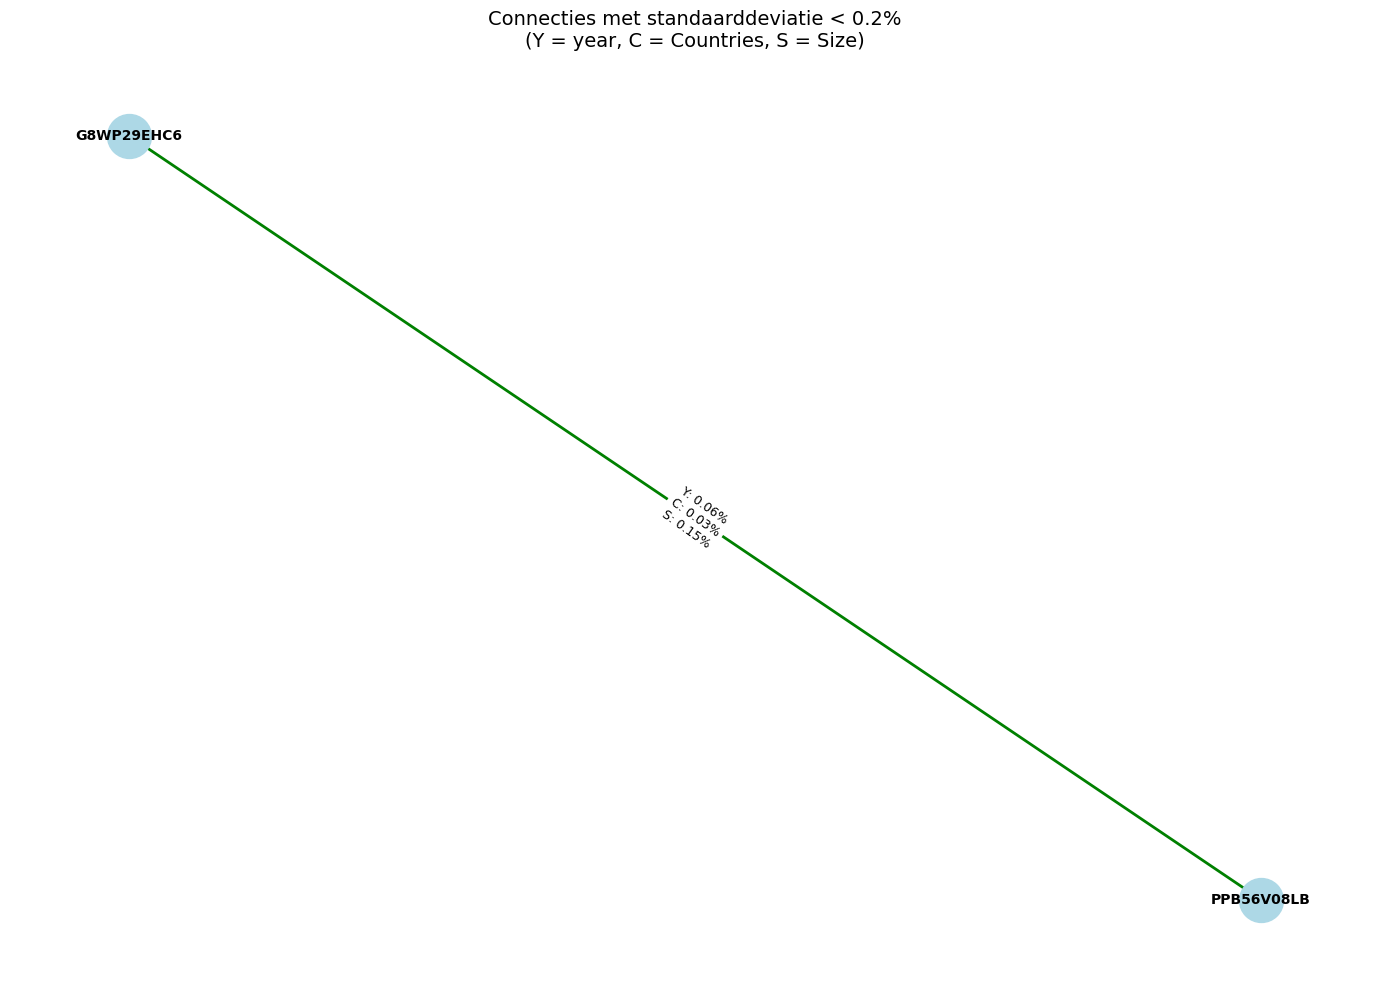

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# === PAD NAAR JOUW BESTAND (pas dit aan!) ===
file_path = f"/Users/biekeleenknegt/Documents/Github/SCM_GW/product_mpe_avg_stdv.xlsx"
sheet_name = "Sheet1"
std_dev_threshold = .2  # hier kun je mee spelen

# === Data inlezen ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Strip '%' en vervang komma’s door punten → zet om naar float
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Filter: alleen rijen waar alle drie de standaarddeviaties < drempel
filtered = df[
    (df['Years_StdDev'] < std_dev_threshold) &
    (df['Countries_StdDev'] < std_dev_threshold) &
    (df['Sizes_StdDev'] < std_dev_threshold)
]

# Extract edges en bijhorende labels met 3 std. dev's
edges = []
edge_labels = {}
for _, row in filtered.iterrows():
    loc1, loc2 = row.iloc[0].split(" vs ")
    edges.append((loc1, loc2))
    label = (
        f"Y: {row['Years_StdDev']:.2f}%\n"
        f"C: {row['Countries_StdDev']:.2f}%\n"
        f"S: {row['Sizes_StdDev']:.2f}%"
        
    )
    edge_labels[(loc1, loc2)] = label

# Unieke locaties
nodes = sorted(set([loc for edge in edges for loc in edge]))

# === Graaf tekenen ===
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color='green', width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Teken standaarddeviaties op de lijnen
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title(f"Connecties met standaarddeviatie < {std_dev_threshold}%\n(Y = year, C = Countries, S = Size)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


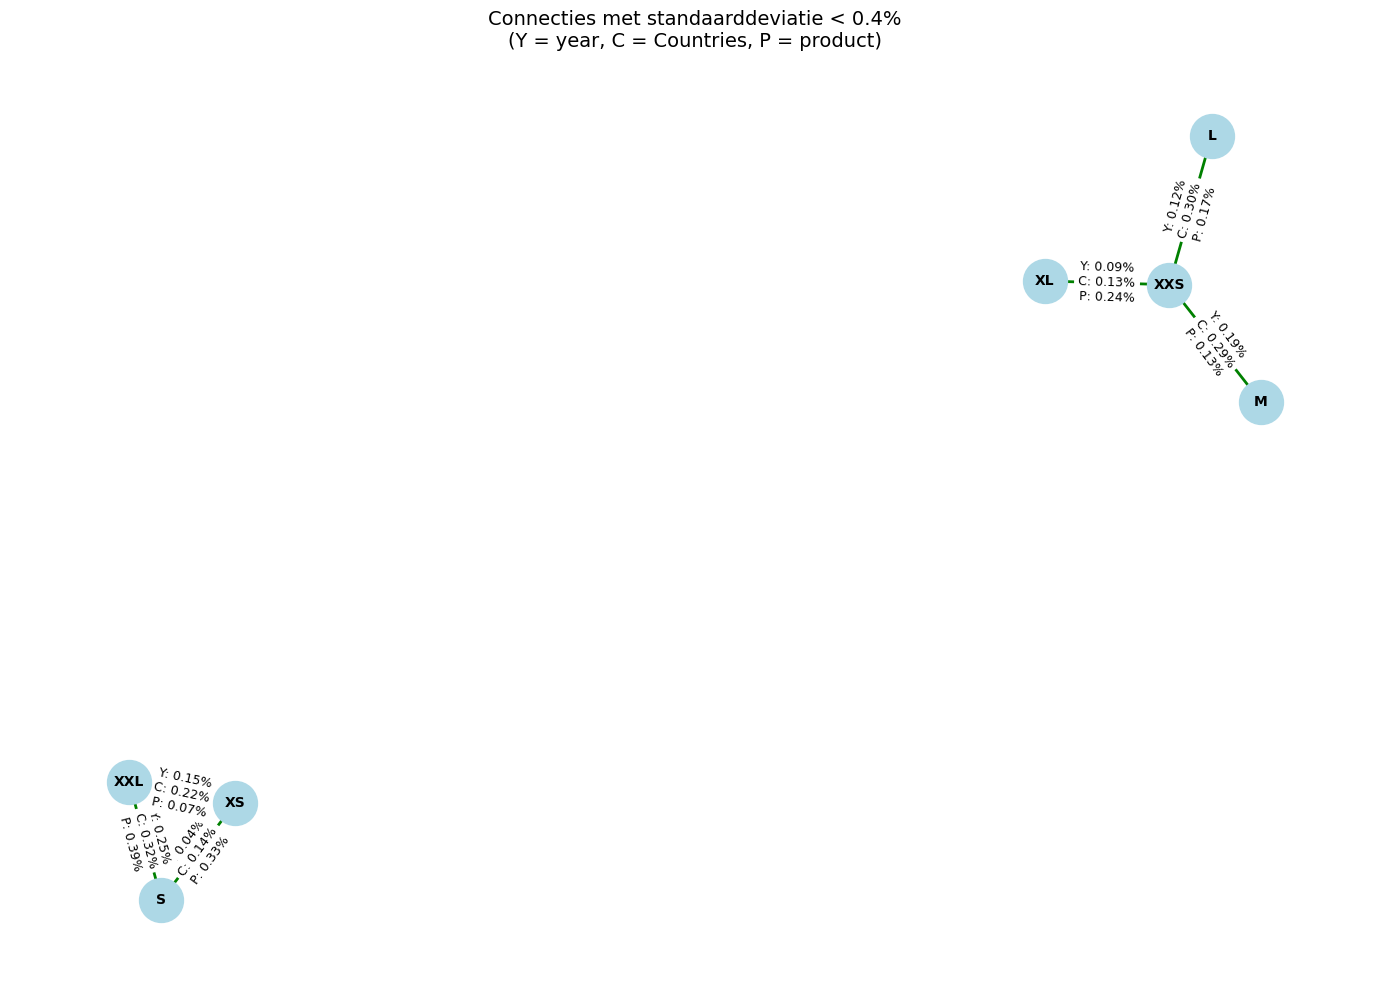

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# === PAD NAAR JOUW BESTAND (pas dit aan!) ===
file_path = f"/Users/biekeleenknegt/Documents/Github/SCM_GW/size_mpe_avg_stdv.xlsx"
sheet_name = "Sheet1"
std_dev_threshold = .4  # hier kun je mee spelen

# === Data inlezen ===
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Strip '%' en vervang komma’s door punten → zet om naar float
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '.').astype(float)

# Filter: alleen rijen waar alle drie de standaarddeviaties < drempel
filtered = df[
    (df['Years_StdDev'] < std_dev_threshold) &
    (df['Countries_StdDev'] < std_dev_threshold) &
    (df['Products_StdDev'] < std_dev_threshold)
]

# Extract edges en bijhorende labels met 3 std. dev's
edges = []
edge_labels = {}
for _, row in filtered.iterrows():
    loc1, loc2 = row.iloc[0].split(" vs ")
    edges.append((loc1, loc2))
    label = (
        f"Y: {row['Years_StdDev']:.2f}%\n"
        f"C: {row['Countries_StdDev']:.2f}%\n"
        f"P: {row['Products_StdDev']:.2f}%"
        
    )
    edge_labels[(loc1, loc2)] = label

# Unieke locaties
nodes = sorted(set([loc for edge in edges for loc in edge]))

# === Graaf tekenen ===
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color='green', width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Teken standaarddeviaties op de lijnen
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title(f"Connecties met standaarddeviatie < {std_dev_threshold}%\n(Y = year, C = Countries, P = product)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


STEP 4 aggregate over the chosen topics

In [ ]:
# code moet hier nog komen die dan da demand wegschrijft naar een excel

STEP 5 FORECAST

MOVING AVERAGE

In [ ]:
import pandas as pd
import os

# Load Excel file
file_path = "/Users/biekeleenknegt/Desktop/Supply Chain Management/SCM_GW/Real Demand.xlsx"
sheet_name = "Real Demand"

# Load data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rename 'season' to 'year'
df = df.rename(columns={'season': 'year'})

# Sort by year
df = df.sort_values(by='year')

# Determine how many years are available per product-size-country
year_counts = df.groupby(['product_id', 'size', 'channel_id'])['year'].nunique().reset_index()
year_counts = year_counts.rename(columns={'year': 'max_years'})

# Merge with full dataset so each row knows how many years are available
df = df.merge(year_counts, on=['product_id', 'size', 'channel_id'], how='left')

# Create output folder
output_folder = "/Users/biekeleenknegt/Documents/GitHub/SCM_GW/Forecasts_By_Window"
os.makedirs(output_folder, exist_ok=True)

# Dictionary to collect forecasts per window
all_window_dfs = dict()

# Loop over all product-size-channel combinations
for _, row in year_counts.iterrows():
    product = row['product_id']
    size = row['size']
    channel = row['channel_id']
    max_years = row['max_years']
    
    sub_df = df[(df['product_id'] == product) &
                (df['size'] == size) &
                (df['channel_id'] == channel)].copy()
    
    sub_df = sub_df.sort_values(by='year')
    
    for window in range(1, max_years + 1):
        sub_df[f'ma_{window}'] = sub_df['real demand'].rolling(window=window, min_periods=1).mean()
        forecast_row = sub_df.tail(1).copy()
        forecast_row['window'] = window
        forecast_row['forecast'] = forecast_row[f'ma_{window}']
        
        # Add relevant columns
        forecast_row = forecast_row[['product_id', 'size', 'channel_id', 'year', 'forecast']]
        
        if window not in all_window_dfs:
            all_window_dfs[window] = []
        all_window_dfs[window].append(forecast_row)

# Write each window's forecasts to a separate Excel file
for window, dfs in all_window_dfs.items():
    result_df = pd.concat(dfs, ignore_index=True)
    output_path = os.path.join(output_folder, f"Forecast_Window_{window}.xlsx")
    result_df.to_excel(output_path, index=False)

print(f"Forecasts per product-size-channel written to: {output_folder}")

HOLT

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import Holt

# Excel-bestand inlezen
bestandspad = 'bestand.xlsx'
df = pd.read_excel(bestandspad)

# Parameters voor trend
alpha = 0.3  # = level
beta = 0.1   # = trend
# --> moeten we aanpassen

results_holt = []

# Holt's methode toepassen per product en size
for (product, size), group in df.groupby(['product_id', 'size']):
    data = group['demand'].values
    index = group['year'].values

    if len(data) > 2:  # (want Holt werkt pas goed vanaf 3 punten)
        model = Holt(data)
        fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
        forecast = fit.fittedvalues

        for i, year in enumerate(index):
            results_holt.append({
                'product_id': product,
                'size': size,
                'year': year,
                'actual': data[i],
                'forecast': forecast[i]
            })

df_holt = pd.DataFrame(results_holt)

#in excel zetten eventueel?
df_holt.to_excel('forecast_resultaten.xlsx', index=False)


EXPONENTIAL SMOOTHING

In [ ]:
#HIER NOG PLAKKEN KRIJG ERROR BIJ MIJ